# Representations of hardcore 3-interaction orbifold groups

The 3 stranded group:
$$ \mathcal{G}_3 = \left< \sigma_1, \sigma_2 \mid \sigma_1^2 = \sigma_2^2 = 1\right>$$
The symmetric group on 3 letters:
$$ S_3 = \left< \sigma_1, \sigma_2 \mid \sigma_1^2 = \sigma_2^2 = (\sigma_2\sigma_1)^3= 1\right>$$
Note that $S_3$ has exactly one more relation and it corresponds exactly to the triple point.

We want to look for a representation of $\mathcal{G}_3$ into $U(8)$. Here I'm thinking that each of the 3 particles comes with a spin which can be either up or down. That attaches a $\mathbb{C}^2$ tensor factor to each of the strands/particles. Hence we are acting on $\mathbb{C}^2\otimes \mathbb{C}^2 \otimes \mathbb{C}^2 \cong \mathbb{C}^8$.

We'll want this to generalize to a higher stranded groups, so I'm thinking that the $\sigma_i$ should correspond to matrices which are "local" in the sense that they only act non-trivially on the $i^{th}$ and $(i+1)^{st}$ $\mathbb{C}^2$ tensor factors. This has the advantage that it will give us the $\sigma_i,\sigma_j\quad |i-j|>1$ commutation relation for free in the higher stranded groups $\mathcal{G}_n$.

I'll also make the assumption that, when restricted to "their" summands, $\sigma_i, \sigma_j$ should act in the _same way_. That seems realistic when we are considering indistinguishable particles. That means that
$$ \sigma_1 = M \otimes I_2, \quad \sigma_2 = I_2 \otimes M$$ for some $M \in U(\mathbb{C}^2\otimes\mathbb{C}^2)$. For $n$-particles:
$$ \sigma_i = \underbrace{I_2 \otimes \cdots \otimes I_2}_{i-1} \otimes M \otimes \underbrace{I_2 \otimes \cdots \otimes I_2}_{n-i-1}.$$


## What kind of matrices are these: Hermitian Unitary matrices

Any unitary matrix rep. $M$ will have $M M^\dagger=1$. As $\sigma_i^2=1$ for all $i$, we must also have $M^2=1$ so $M=M^\dagger$ by uniqueness of inverses. i.e. $M$ is both unitary and Hermitian.

Two facts:
1. Unitary matrices have a complete set of eigenvectors and eigenvalues which lie in $U(1)$.
2. Hermitian matrices have complete set of eigenvectors and eigenvalues which are real.
So any such matrix has eigenvalues equal to $\pm 1$.

Thus $M$ is of the form $$M = P S P^{-1}$$ where $S$ is a diagonal matrix with non-zero entries equal to $\pm1$ and we can assume $P \in SU(4)$.

There are some obvious choices for $P$'s and $S$'s which give the trivial and symmetric group representations. We could have $P$ be simply the matrix which swaps tensor factors. For reference, that one is
$$ \left(\begin{matrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1
\end{matrix}\right). $$
That looks weird, but if $e_1,e_2$ and $f_1,f_2$ are bases for the $\mathbb{C}^2$s, then interchanging the $\mathbb{C}^2$ factors leaves $e_1\otimes f_1$ and $e_2\otimes f_2$ alone.


### Such $P$ give a (mostly) trivial representation to $\gamma=(\sigma_2\sigma_1)^3$.

In [1]:
import itertools

In [2]:
signs = var('s_1,s_2,s_3,s_4')

s1 = signs[0]
s2 = signs[1]
s3 = signs[2]
s4 = signs[3]

for n in range(4):
    assume(signs[n],'integer')

S = diagonal_matrix([(-1)^s1,(-1)^s2,(-1)^s3,(-1)^s4])

pretty_print(S)

[(-1)^s_1        0        0        0]
[       0 (-1)^s_2        0        0]
[       0        0 (-1)^s_3        0]
[       0        0        0 (-1)^s_4]

In [3]:
P = matrix([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])
M = P*S*P^-1
sigma1 = M.tensor_product(identity_matrix(2))
sigma2 = identity_matrix(2).tensor_product(M)

In [4]:
# verify that this is really a rep.
assert sigma1.conjugate_transpose() == sigma1
assert sigma2.conjugate_transpose() == sigma2
assert sigma1^2 == identity_matrix(8)
assert sigma2^2 == identity_matrix(8)
print "passed check"


passed check


In [5]:
gamma = ((sigma2*sigma1)^3).simplify_full()

pretty_print(gamma)

[               1                0                0                0                0                0                0                0]
[               0 (-1)^(s_1 + s_3)                0                0                0                0                0                0]
[               0                0 (-1)^(s_2 + s_3)                0                0                0                0                0]
[               0                0                0 (-1)^(s_3 + s_4)                0                0                0                0]
[               0                0                0                0 (-1)^(s_1 + s_2)                0                0                0]
[               0                0                0                0                0 (-1)^(s_2 + s_3)                0                0]
[               0                0                0                0                0                0 (-1)^(s_2 + s_4)                0]
[               0                0                0                0                0                0                0                1]

### Let's add a twist

That is, pre-multiply the swap matrix by an element of the form $I_2 \otimes H$ for $H\in SU(2)$. i.e. twist then swap.

In [6]:
# Hadamard twist
H = matrix([[1,1],[1,-1]])/sqrt(2)

# "swap" swaps the tensor factors
swap = matrix([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])
# P swaps with a twist
P = swap*(identity_matrix(2).tensor_product(H))

pretty_print(H)
pretty_print(P)

[ 1/2*sqrt(2)  1/2*sqrt(2)]
[ 1/2*sqrt(2) -1/2*sqrt(2)]

[ 1/2*sqrt(2)  1/2*sqrt(2)            0            0]
[           0            0  1/2*sqrt(2)  1/2*sqrt(2)]
[ 1/2*sqrt(2) -1/2*sqrt(2)            0            0]
[           0            0  1/2*sqrt(2) -1/2*sqrt(2)]

In [7]:
M = P*S*P^-1

pretty_print(M)

[1/2*(-1)^s_1 + 1/2*(-1)^s_2                           0 1/2*(-1)^s_1 - 1/2*(-1)^s_2                           0]
[                          0 1/2*(-1)^s_3 + 1/2*(-1)^s_4                           0 1/2*(-1)^s_3 - 1/2*(-1)^s_4]
[1/2*(-1)^s_1 - 1/2*(-1)^s_2                           0 1/2*(-1)^s_1 + 1/2*(-1)^s_2                           0]
[                          0 1/2*(-1)^s_3 - 1/2*(-1)^s_4                           0 1/2*(-1)^s_3 + 1/2*(-1)^s_4]

In [8]:
# generators are "local", only operate on adjacent tensor factors
sigma1 = M.tensor_product(identity_matrix(2))
sigma2 = identity_matrix(2).tensor_product(M)

In [9]:
# verify that this is really a rep.
assert sigma1.conjugate_transpose() == sigma1
assert sigma2.conjugate_transpose() == sigma2
assert sigma1^2 == identity_matrix(8)
assert sigma2^2 == identity_matrix(8)
print "passed check"

passed check


In [10]:
# gamma is the triple-point generator 

gamma = ((sigma2*sigma1)^3).simplify_full()

gamma_f = matrix([[element.function(s1,s2,s3,s4) for element in row] for row in gamma])

# Investigate choice of signs

in double point $\pi_1$ rep. on triple point rep; when $P$ is constructed via the Hadamard matrix

In [11]:
for a,b,c,d in itertools.product(range(2),range(2),range(2),range(2)):
    print "exponents of -1: "+ str((a,b,c,d)) + "\t" + str(gamma_f(a,b,c,d) == identity_matrix(8))

exponents of -1: (0, 0, 0, 0)	True
exponents of -1: (0, 0, 0, 1)	False
exponents of -1: (0, 0, 1, 0)	False
exponents of -1: (0, 0, 1, 1)	False
exponents of -1: (0, 1, 0, 0)	False
exponents of -1: (0, 1, 0, 1)	False
exponents of -1: (0, 1, 1, 0)	False
exponents of -1: (0, 1, 1, 1)	False
exponents of -1: (1, 0, 0, 0)	False
exponents of -1: (1, 0, 0, 1)	False
exponents of -1: (1, 0, 1, 0)	False
exponents of -1: (1, 0, 1, 1)	False
exponents of -1: (1, 1, 0, 0)	False
exponents of -1: (1, 1, 0, 1)	False
exponents of -1: (1, 1, 1, 0)	False
exponents of -1: (1, 1, 1, 1)	True


#### some are square roots of unity

In [12]:
for a,b,c,d in itertools.product(range(2),range(2),range(2),range(2)):
    print "exponents of -1: "+ str((a,b,c,d)) + "\t" + str(gamma_f(a,b,c,d)^2 == identity_matrix(8))

exponents of -1: (0, 0, 0, 0)	True
exponents of -1: (0, 0, 0, 1)	False
exponents of -1: (0, 0, 1, 0)	False
exponents of -1: (0, 0, 1, 1)	True
exponents of -1: (0, 1, 0, 0)	False
exponents of -1: (0, 1, 0, 1)	True
exponents of -1: (0, 1, 1, 0)	False
exponents of -1: (0, 1, 1, 1)	False
exponents of -1: (1, 0, 0, 0)	False
exponents of -1: (1, 0, 0, 1)	False
exponents of -1: (1, 0, 1, 0)	True
exponents of -1: (1, 0, 1, 1)	False
exponents of -1: (1, 1, 0, 0)	True
exponents of -1: (1, 1, 0, 1)	False
exponents of -1: (1, 1, 1, 0)	False
exponents of -1: (1, 1, 1, 1)	True


#### _All_ are fourth roots of unity

In [13]:
for a,b,c,d in itertools.product(range(2),range(2),range(2),range(2)):
    print "exponents of -1: "+ str((a,b,c,d)) + "\t" + str(gamma_f(a,b,c,d)^4 == identity_matrix(8))

exponents of -1: (0, 0, 0, 0)	True
exponents of -1: (0, 0, 0, 1)	True
exponents of -1: (0, 0, 1, 0)	True
exponents of -1: (0, 0, 1, 1)	True
exponents of -1: (0, 1, 0, 0)	True
exponents of -1: (0, 1, 0, 1)	True
exponents of -1: (0, 1, 1, 0)	True
exponents of -1: (0, 1, 1, 1)	True
exponents of -1: (1, 0, 0, 0)	True
exponents of -1: (1, 0, 0, 1)	True
exponents of -1: (1, 0, 1, 0)	True
exponents of -1: (1, 0, 1, 1)	True
exponents of -1: (1, 1, 0, 0)	True
exponents of -1: (1, 1, 0, 1)	True
exponents of -1: (1, 1, 1, 0)	True
exponents of -1: (1, 1, 1, 1)	True


#### I think that this is a side effect of properties of the Hadamard matrix

i.e. $H^2=I$

In [14]:
print H^2 == identity_matrix(2)

True


## Investigate alternative choices of $P$

Start with substituting $H$ with something in the image of $SO(2)$ in $U(2)$

In [15]:
theta = var('theta')

S = diagonal_matrix([(-1)^s1,(-1)^s2,(-1)^s3,(-1)^s4])
# "swap" swaps the tensor factors
swap = matrix([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])
# P swaps with a twist
P = swap*(identity_matrix(2).tensor_product(matrix([[sin(theta),-cos(theta)],[cos(theta),sin(theta)]])))
M = P*S*P^-1
sigma1 = M.tensor_product(identity_matrix(2))
sigma2 = identity_matrix(2).tensor_product(M)
gamma = ((sigma2*sigma1)^3).simplify_full()

In [16]:
# check that this is a rep.
assert sigma1.conjugate_transpose() == sigma1
assert sigma2.conjugate_transpose() == sigma2
assert (sigma1^2) == identity_matrix(8)
assert (sigma2^2) == identity_matrix(8)
print "passed check"

passed check


#### the representation is relatively complicated function of its parameters, look at one of the entries of gamma

In [17]:
pretty_print(gamma[0,0].simplify_full())

-2*(2*((-1)^s_1 - (-1)^s_2)*(-1)^s_4 - 3*(-1)^(s_1 + s_2) + 1)*cos(theta)^6*sin(theta)^2 - 2*(2*((-1)^s_1 - (-1)^s_2)*(-1)^s_3 - 2*((-1)^s_1 - (-1)^s_2)*(-1)^s_4 + 2*(-1)^(s_1 + s_2) - 5)*cos(theta)^4*sin(theta)^4 + 2*(2*((-1)^s_1 - (-1)^s_2)*(-1)^s_3 + 3*(-1)^(s_1 + s_2) - 1)*cos(theta)^2*sin(theta)^6 + cos(theta)^8 + sin(theta)^8

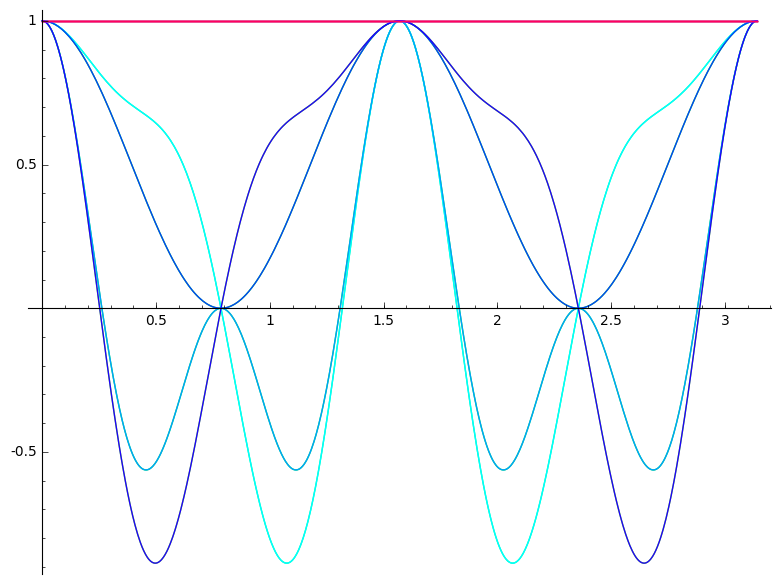

In [18]:
# plot all 16 choices of signs, some are redundant

f = ( ((sigma2*sigma1)^3)[0,0].simplify_full() ).function(s1,s2,s3,s4)

Plt = Graphics()

for n,(a,b,c,d) in enumerate(itertools.product(range(2),range(2),range(2),range(2))):
    Plt += plot(f(a,b,c,d),(theta,0,pi), color=rainbow(16)[n])
    
    
Plt.show()

#### plot as a animated matrix 

Where $\theta$ is time

In [19]:
gamma_f = matrix([[ element.function(s1,s2,s3,s4) for element in row] for row in gamma])

Animation with 126 frames
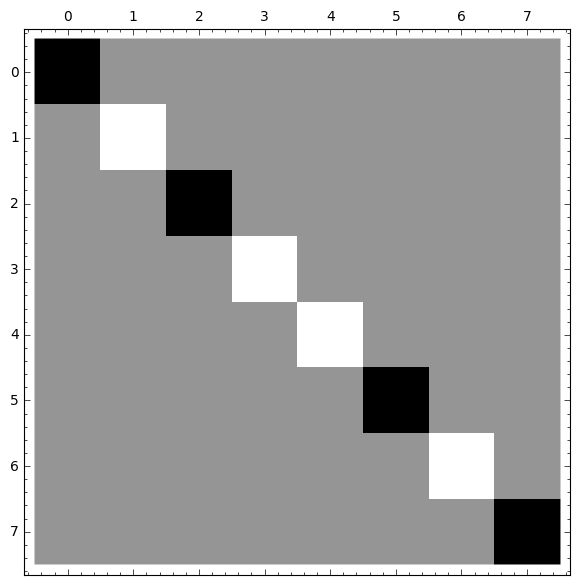

In [20]:
# plot the one with the most(?) interesting set of signs
anivec = []
for t in srange(0,2*pi,0.05):
    anivec.append(matrix_plot(gamma_f(0,1,1,0)(theta=t)))
    
ani = animate(anivec)
ani.show()

#### Anyway, some of these do not have trivial fourth powers

Check out a rational family

In [21]:
for k in range(1,20):
    print "k="+str(k)+ "\t" + str(gamma_f(0,1,1,0)(theta=pi/k)^4 == identity_matrix(8))

k=1	True
k=2	True
k=3	True
k=4	True
k=5	False
k=6	True
k=7	False
k=8	False
k=9	False
k=10	False
k=11	False
k=12	False
k=13	False
k=14	False
k=15	False
k=16	False
k=17	False
k=18	False
k=19	False


Are there any powers when $k=5$ which are trivial?

In [22]:
for k in range(1,20):
    print "k="+str(k)+ "\t" + str(gamma_f(0,1,1,0)(theta=pi/5)^k == identity_matrix(8))

k=1	False
k=2	False
k=3	False
k=4	False
k=5	False
k=6	False
k=7	False
k=8	False
k=9	False
k=10	False
k=11	False
k=12	False
k=13	False
k=14	False
k=15	False
k=16	False
k=17	False
k=18	False
k=19	False


In [23]:
fib = gamma_f(0,1,1,0)(theta=pi/5)

#pretty_print(fib.charpoly())
print fib.charpoly()

x^8 + (-sqrt(5) + 1)*x^6 + (-1/2*sqrt(5) + 7/2)*x^4 + (-sqrt(5) + 1)*x^2 + 1


In [24]:
# are the eigenvalues on the unit circle?

for ev in fib.eigenvalues():
    print N(ev)
    print N(abs(ev))
    print ""

-0.809016994374947 - 0.587785252292473*I
1.00000000000000

-0.809016994374947 - 0.587785252292473*I
1.00000000000000

0.809016994374947 + 0.587785252292473*I
1.00000000000000

0.809016994374947 + 0.587785252292473*I
1.00000000000000

-0.809016994374947 + 0.587785252292473*I
1.00000000000000

-0.809016994374947 + 0.587785252292473*I
1.00000000000000

0.809016994374947 - 0.587785252292473*I
1.00000000000000

0.809016994374947 - 0.587785252292473*I
1.00000000000000



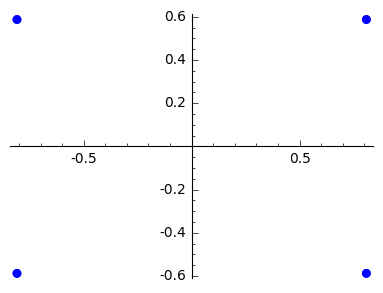

In [25]:
# Where are they exactly? A rectangle, it seems

Plt = Graphics()

for ev in fib.eigenvalues():
    cx_pt = N(ev)
    Plt += point2d( (real_part(cx_pt), imag_part(cx_pt)), size=40)
    
Plt.show(figsize=4,aspect_ratio=1)

#### What about the other powers?

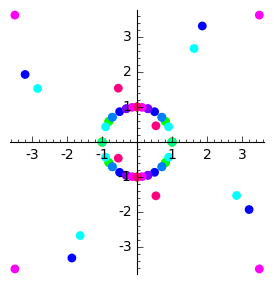

In [26]:
# plot some eigenvalues

top = 12

Plt = Graphics()
for n in range(1,top+1):
    mat = gamma_f(0,1,1,0)(theta=pi/n)
    
    for ev in mat.eigenvalues():
        cx_pt = N(ev)
        Plt += point2d( (real_part(cx_pt), imag_part(cx_pt)), size=40, color=rainbow(top)[n-1])
    
Plt.show(figsize=4,aspect_ratio=1)